___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Support Vector Machines (SVM)

Math behind this algorithm is found in Chapter 9 of Statistical Learning by Gareth James

Formal definition: Supervised Learning Models with associated learning algorithms that analyze data and recognize patterns used for classification and regression analysis.

Given a set of training examples, each marked for belonging to 1 of 2 categories, an SVM training algorithm builds a model that assigns new examples into one category or another, turning the problem into a non-probabilistic binary linear classifier.
- non-probabilistic means the classifier does not directly estimate probabilites for each class, meaning the output is not a percentage probability score (like this 50% chance of rain), instead makes a binary decision (class 1 or 2) based off of predetermined rules
- binary means classifier only has 2 categories/classes
- linear classifier means decision boundary separating 2 classes is a linear function of the input features where classifiers make predictions by computing a weighted sum of the input features and comparing it to a threshold (if sum is greater than threshold, it predicts 1 class, otherwise, predicts the other)

SVM model is a representation of examples as points in space, mapped so that examples of the separate categories are divided by clear gap that is as wide as possible. New examples are then mapped int othe same space and predicted to belong to a category based on which side of the gap they fall on

Imagine we have training data below:

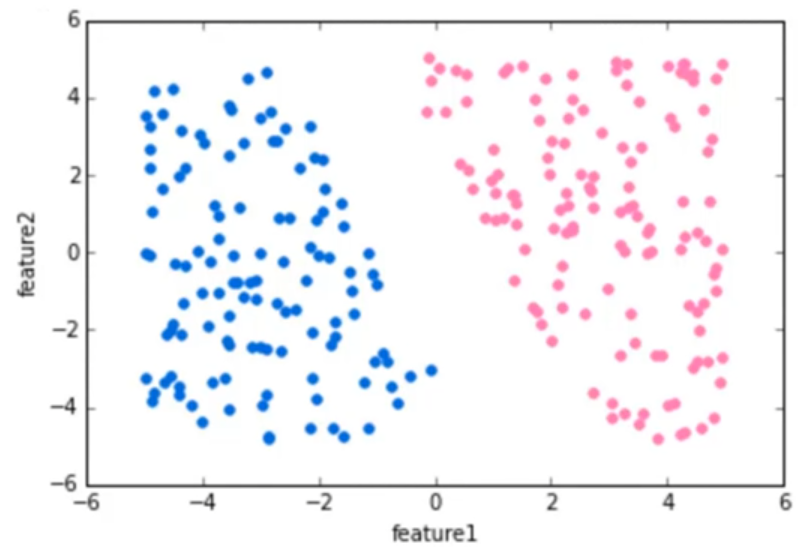





## Pros of SVM: 

- Effective at high-dimensional spaces and when the number of features is greater than the number of samples. SVMs work by finding the hyperplane (a separating line) that best separates the classes in the feature space. 
    - suitable for tasks with large number of features like text classification and image recognition
- Robust to overfitting compared to other algorithms especially when the margin parameter ("C") is appropriately chosen
    - this can be done by maximizing the margin between decision boundary and the nearest data points of each class
- Can handle both linear and non-linear classification tasks through the use of different kernel functions such as linear, polynomial, radial basis function (RBF), and sigmoid kernels, allowing SVM to capture complex relationships in data
    - `linear kernel` computes the dot product between pairs of data points in the original feature space (suitable for linearly separable data and linear decision boundary)
        - simplest kernel where the data is linearly separable, a line can be drawn between the data
        - computes the dot product (how similar two lists of numbers are) is  between feacture vectors in the original space
            - ex: List A: [2, 3, 4], List B: [5, 6, 7] - To find the dot product: (2x5)+(3x6)+(4x7)=10+18+28=56... So, the dot product of List A and List B is 56
            - higher the dot product, it means the list are pointing in similar directions (small if they're different directions)
    - `polynomial kernel` raises the dot product of two vectors in the original feature space to a power specified by the degree parameter to capture non-linear relationships in the data and is useful for datasets with polynomial decision boundaries
        - transforms data into higher dimensional space using polynomial functions
    - `Gaussian kernel` (a.k.a. `RBF kernel`) measures the similarity between datapoints based on their Euclidean distance in the feature space, characterized by 2 parameters: lower-case gamma and lower-case sigma
        - RBF kernel can model complex decision boundaries and is effective for non-linear separable data
    - `sigmoid kernel` computes hyperbolic tangent of the dot product between pairs of data suitable for data that is not linearly separable and useful in neural network applications
        - based on hyperbolic tangent and sigmoid functions (usually for binary classification)
- Effective for small datasets where complex decision boundaries that maximize the margin between classes are present
- SVMs only need to store the support vectors, which are the data points closest to the decision boundary, making them memory efficient, especially in large datasets
- Can handle unbalanced datasets where classes are unevenly distributed 


Notice how black, green, and pink lines are all possible hyperplane lines that can separate the classes
- the question arises, how do we choose the line that separates the classes best?
    - the best way is to pick a hyperplane that maximizes the margin between classes

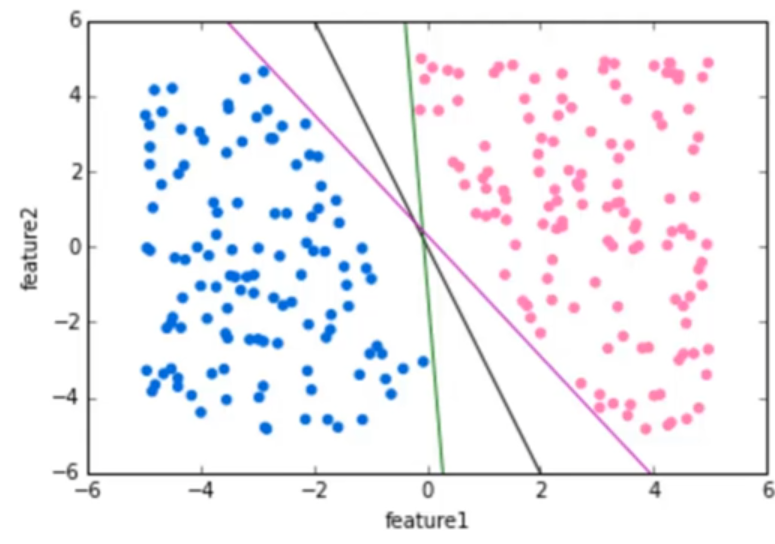

Hyperplanes are flat subspace dividers of a higher-dimension space (they are NOT the bounding box in segmentation tasks)

We actually want something like the dotted line to be the hyperplane and we can see there big margins aside from the dotted line:



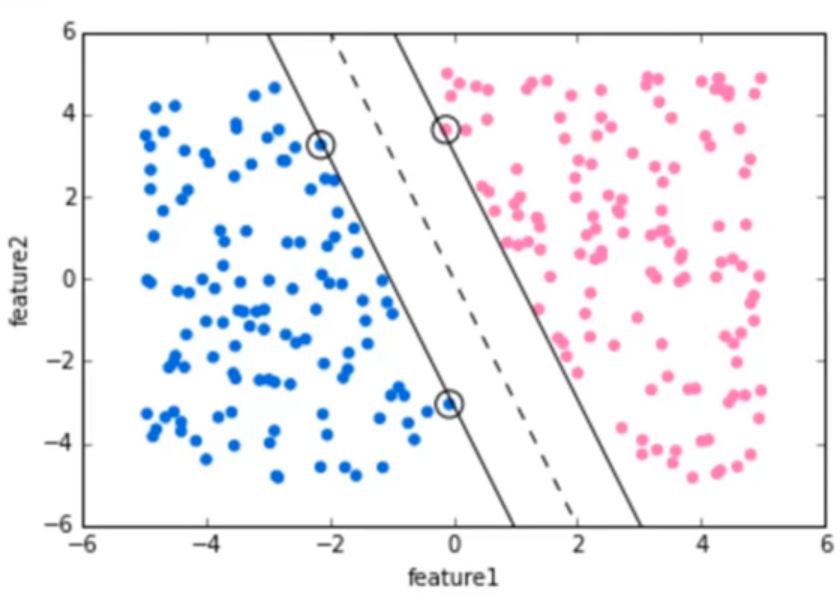

## "Kernel Trick"

Viewing distributions in a higher dimension

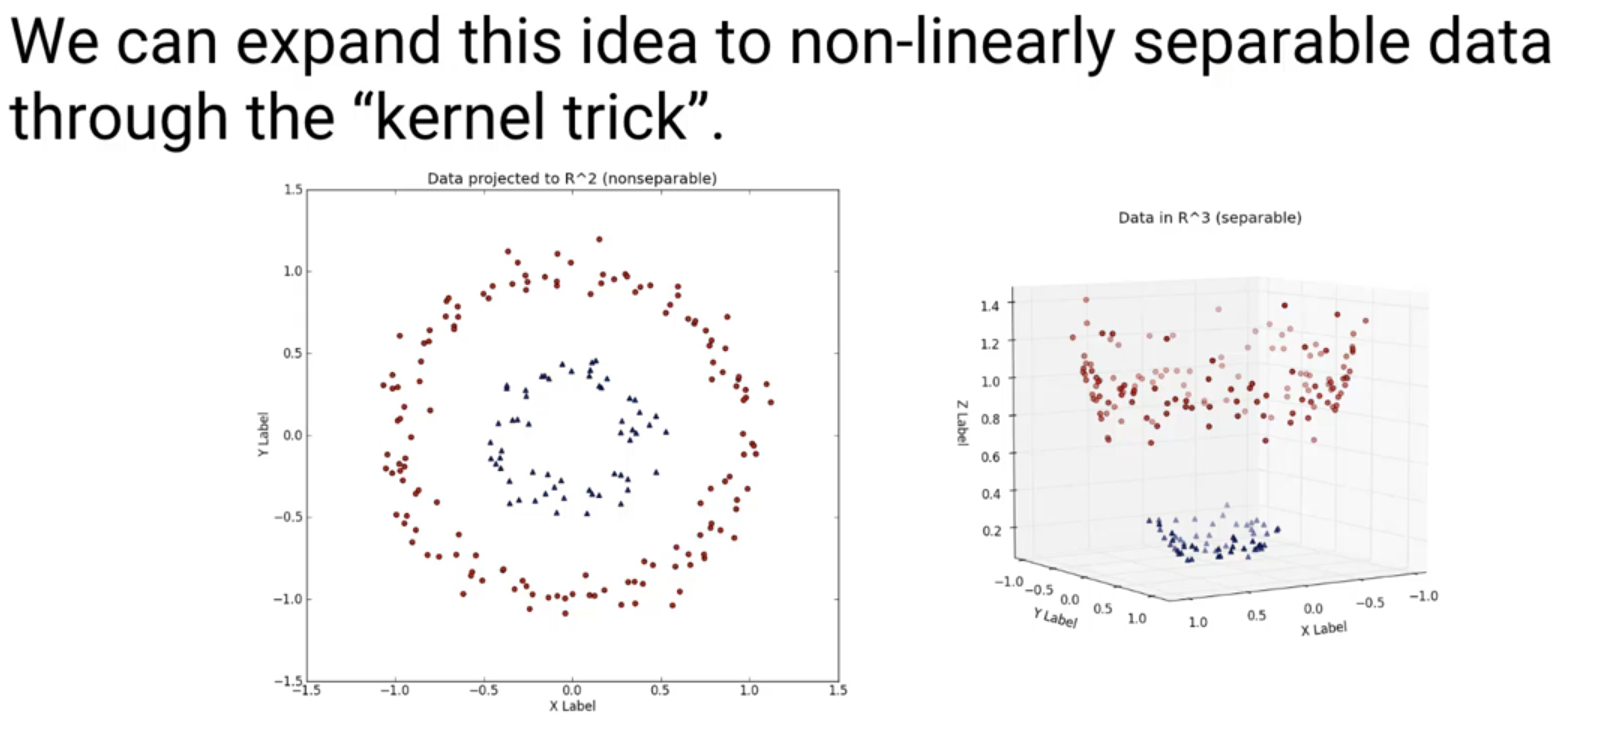

- For the left hand 2D plot (with an "X-label" and "y-label"), we see that there is a blue circle and a brown circle and the data is not linearly separable (we cannot draw a straight line to separate these classes)

We can view the same distribution on the left at a higher dimension, as the visual on the right and then we can see that there is a space where we can separate the data linearly. 
- this new plot is 3D with "X-label", "y-label", and a "z-label"

We can cut the 3D plot in half, as shown below:

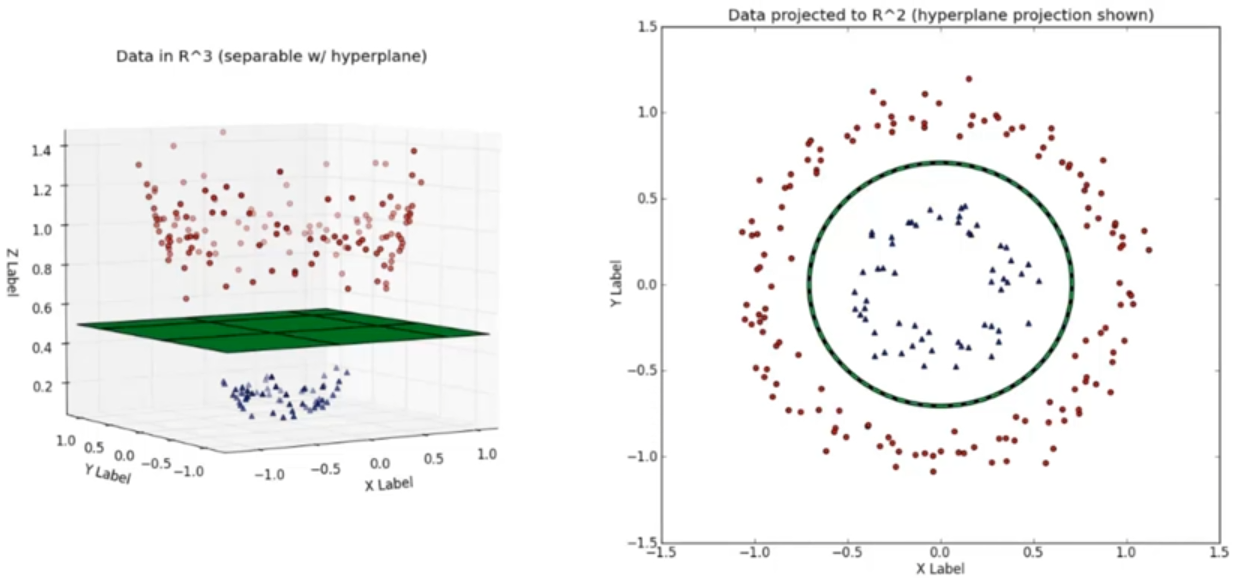

The math behind the kernel trick is in Chapter 9 of Introduction to Statistical Learning.

## Decision Boundary

Decision Boundary is a hypersurface that separates the datapoints of different classes in the feature space. In binary classification, decision boundary deteremines which class a new data point belongs to based on its position relative to the boundary. In SVMs, the decision boundary is determined by support vectors, which are the data points closest to the boundary. The goal of SVM training is to find the decision boundary that maximizes the margin (i.e. distance between decision boundary and the nearest data points of each class). The choice of kernel function influences the shape and complexity of the decision boundary. 

Hypersurface is a generalized concept (from topology and differential geometry) of a surface to higher-dimensional spaces
   - 2 dimensional space (like surface of a sphere), a surface is one-dimensional object that separates the space into two regions
   - in high dimensional spaces, a hyper surface is (n-1) dimensional object that divides the space into two or more regions
       - ex: in 3-d space, a hypersurface is a 2-d object such as a plane or curved surface
   - dealing with classification problems where datapoints belong to different classes or categories, the goal is to find a model that can accurately separate the classes (in many cases, especially when dealing with complex datasets, the decision boundary is not a simple line or plane but more an intricate surface that can have higher-dimensional shapes)
   - understanding hypersurfaces can allow for comprehension of the feature space, understand the shape and characteristics of decision boundaries, and understand how different classes are distributed in the feature space
       - understanding structure of feature space can allow for better understanding of which features to engineer, model selection, and hyperparameter tuning to improve the model performance
       
Linear Decision Boundary looks like this: 

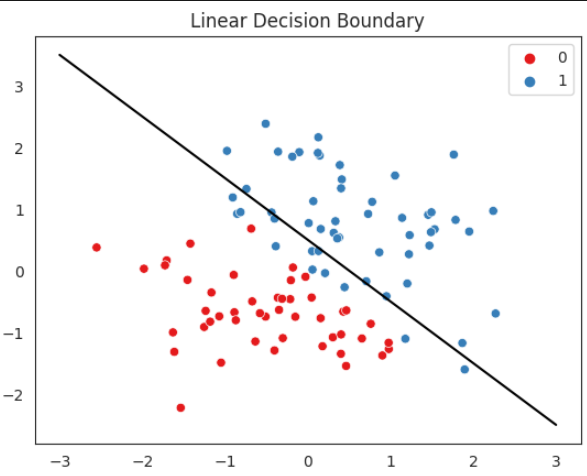


- anything on the left is considered one class, any on the right of the linear line is considered the other class
- sometimes there is overlap between distribution of 2 classes in the feature space, and becomes challenging for linear decision boundary to separate them perfectly (it's shown in the visual where there are some blue dots crossed over to the other class)


## Feature Engineering

The process of creating new features or modifying existing ones in a dataset to improve performance of ML models. This involves slecting, transforming, and creating features from raw data that are most relevant to the problem at hand (plays a crucial role in projects because quality of features directly impact model's ability to learn patterns). 

Examples:
- polynomial features: generating new fatures by polynomial combinations of existing features can capture non-linear relationships between features and the target variable
- binning or discretization: grouping continuous numerical features into bins or intervals, which can help capture non-linear relationships and reduce impact of outliers
- feature interaction:  creating new features by combining existing ones such as multiplying them, dividing, etc. 
- feature selection: selecting the most relevant ones and removing irrelevant/redundant features (techniques include things like univariate feature selection, recursive feature elimination, feature importance scores from tree-based models)
- date and time features: extracting relevant information from date and time variables (like day, week, month, year, season, time, etc.)
- domain-specific feature engineering: creating features from understanding the problem and involve features relevant to application or industry

## Feature Preprocessing (not engineering):

StandardScaler() is a form of feature scaling, which is a subset of feature preprocessing rather than feature engineering. Feature scaling techniques like "StandardScaler()" are focused on transforming numerical features in a dataset to have similar scales, which can be beneficial for gradient descent or distance calculations. Feature preprocessing is important but not considered a part of feature engineering
- feature scaling: standardizing or normalizing numerical features to ensure they have similar scales, helping gradient-based optimization algorithms converge faster
- imputation (handling missing vlaues by imputing them with mean, median, mode, or KNN imputation or predictive imputation
- one-hot encoding: turning features' string values into numeric values that can be passed through a model (converting categorical variables into binary vectors where a category becomes a separate feature with binary values)
- text processing: extract features from text data such as word count, term frequency-inverse document frequency, word embeddings, or topic modeling



## Dot Product

The dot product (known as the scalar product or inner product) is a mathematical operation that takes two equal-length sequences of numbers (usually coordinate vectors) and returns a single number. In simpler terms, the dot product tells you how much two lists of numbers are pointing in the same direction. If the dot product is large, it means the lists are pointing in similar directions. If it's small, they're pointing in different directions.
- ex: List A: [2, 3, 4], List B: [5, 6, 7]
    - To find the dot product: (2 * 5) + (3 * 6) + (4 * 7) = 10 + 18 + 28 = 56 
        - So, the dot product of List A and List B is 56.

Geometrically, the dot product represents the projection of one vector onto another. It's also used to find the angle between two vectors, as well as to determine whether two vectors are orthogonal (perpendicular) to each other. It helps us combine information from different features or learn relationships between features and model parameters for ML tasks. 

Dot Product is usually used in feature engineering. 

Example:
- dataset of house prices, features could include number of bedrooms, size of house, etc.
    - the dot product can be used to combine or transform these different features to create new ones that might be more informative for the model (you might take the dot product of the facture vector with a weight vector to give different importance to different features
    
During training, espeically with algorithms like linear regression or neural networks, the dot product is used in these contexts to calculate similarity between feature vectors and model parameters or used to compute weighted sums of features. 

1. Large Dot Product:

Suppose we have a neural network used for image recognition trained on a massive dataset containing millions of high-resolution images. During inference, the network computes dot products between the image features and learned weights in the fully connected layers.

- Example: If the network correctly identifies a specific object in an image with high confidence, the dot product between the image features and the corresponding weights might be large, indicating a strong correlation.

2. Small Dot Product:

Consider a recommendation system at a large e-commerce platform. The system computes dot products between user embeddings and item embeddings to generate personalized recommendations.

- Example: If a user has a diverse range of interests, their dot products with different item embeddings may be relatively small, indicating a weaker correlation between their preferences and the items being recommended.

3. Variable Dot Product:

In natural language processing tasks such as sentiment analysis or language translation, dot products may be used in attention mechanisms to weigh the importance of different words or tokens in a sentence.

- Example: For a sentiment analysis model, the dot product between word embeddings and attention weights might be large for words that strongly influence the sentiment (e.g., "great," "terrible") and smaller for neutral words.


### Feature Vectors

Feature Vectors represent datapoints in a ML problem. Imagine you have a dataset with different characteristics for each item you are trying to analyze, if you are looking at houses, then # of bedrooms, square footage, location, etc. Each of these characteristics is a dimension inside a multidimensional space. Feature vector is a list (or array) of numbers that represent each of these dimensions for a particular item in your dataset so if you have 3 features for # of bedrooms, square footage, and location, a feature vector might look like "[3,2000,'Suburb']".

Feature vectors are typically organized in a matrix (or nested array dataframe)!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Get the Data

We'll use the built in breast cancer dataset from Scikit Learn. We can get with the load function:

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
# set cancer as an instance so we can use it for training, data exploration, etc. 

cancer = load_breast_cancer()

The data set is presented in a dictionary form:

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
print(cancer['data'])

# nested array with values in a corresponding order (the order matters here because they correspond to names of features)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [26]:
print(cancer['frame'])
print('\n')
print(cancer['target_names'])
print('\n')
print(cancer['filename'])
print('\n')
print(cancer['data_module'])
print('\n')
print(cancer['DESCR'])

# detailed description of the dataset from the key, "DESCR"
# 569 instances and 30 numeric attributes

# the prediction we want to do is whether our breast cancer tumor is malignant or benign using their features and feature values

None


['malignant' 'benign']


breast_cancer.csv


sklearn.datasets.data


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each 

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [7]:
cancer['data']

# 1.790e+01 is 17.99
# 1.038e+01 is 10.38

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# set up a dataframe to use these keys to grab data
# dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
# 'data' and 'feature_names' are dictionary keys themselves from above

df_features = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

# instantiate the dataframe containing the features with aligning feature names with their corresponding numeric value

In [11]:
df_features.head(2)

# just look at the head to make sure all the data is aligned up and working properly

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [12]:
df_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Set up DataFrame

In [28]:
df_features.info()

# there are 569 datapoints, also known as 569 rows (index/row 0 to 568)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
cancer['target']

# there are 569 corresponding values in "target" which is our "ground truth" and are the values we will be testing against the
# "y_test" results we get from "X_test"

# when we train test split and test_size=0.3, 30% of these 569 "0"s and "1"s will be split into the test sample and be used to
# see if the prediction is correct or not

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [30]:
cancer['target_names']

# 1 and 0 represent malignant or benign

array(['malignant', 'benign'], dtype='<U9')

Now let's actually check out the dataframe!

## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df_features 
# we didn't drop the column this time because df_features are all the features/characteristics of benign or 
# malignant cancer

y = cancer['target']
# we set the target variable still to cancer['target'] because we want to predict the "1"s and "0"s


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Train the Support Vector Classifier

In [33]:
from sklearn.svm import SVC

In [46]:
model_SVC = SVC(gamma='auto') # i originally didn't write "(gamma='auto')" but SVC changed over time as the lecture was outdated
# if (gamma='auto') wasn't here, the model actually performs well, but will leave it as "(gamma='auto')" for sake of the lecture
model_SVC.fit(X_train,y_train)

SVC(gamma='auto')

In [61]:
# you can see there are degrees, gamma, kernel, etc. 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations

Now let's predict using the trained model.

In [42]:
predictions_SVC = model_SVC.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(confusion_matrix(y_test,predictions_SVC))

# when gamma is auto, we see that it classified everything as 1


[[  0  66]
 [  0 105]]


In [45]:
print(classification_report(y_test,predictions_SVC))

# when gamma is auto, we see that it classified everything as 1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



C:\Users\raiu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raiu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Notice that we are classifying everything into a single class! This means our model needs to have it parameters adjusted (it may also help to normalize the data).

The model's default values predicted that no tumors were in the 0 class (and sklearn will give you a warning for precision and F1-score for being ill-defined)

The reason this is happening is because our model needs to have its parameters adjusted (and may also help to normalize the data as well)

The best way is to search for the best parameters to use using GridSearch (such as "C" or "gamma" values to use)

# Gridsearch

Finding the right parameters (like what C or gamma values to use) is tricky. But luckily, we can try a bunch of combinations and see what works best. This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this technique is common enough that Scikit-learn has this functionality built in with `GridSearchCV`! The "CV" stands for cross-validation. 

Grid Search is typically required since there's no real way to tell what is a good "C" or "gamma" value by intuition

In [47]:
from sklearn.grid_search import GridSearchCV

ModuleNotFoundError: No module named 'sklearn.grid_search'

In recent versions of scikit-learn, the sklearn.grid_search module has been deprecated, and the functionality has been moved to the sklearn.model_selection module. Specifically, GridSearchCV can now be imported from sklearn.model_selection.

In [48]:
from sklearn.model_selection import GridSearchCV

GridSearchCV takes in a dictionary that describes the parameters that should be tried and a model to train. The Grid of parameters is defined as a `dictionary` where `keys` are the parameters and the `values` is a list of settings to be tested. 

- Dictionary describing the parameters: keys are the names of the hyperparameters of the model you want to tune, and the values are lists of the different settings or values you want to try for each hyperparameter.
- Model to train: This is the machine learning model for which you want to find the best hyperparameters. It can be any model that implements the scikit-learn estimator interface, such as a classifier or a regressor.
- Grid of parameters: This refers to the combination of hyperparameters and their corresponding values that you want to test. GridSearchCV will systematically try each combination of hyperparameters and evaluate the model's performance using cross-validation to find the best combination.

In [50]:
# keys are parameters that go into the model we're using
# in this case, we're using a SVM as our model

parameter_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001,0.00001]}

# for the math behind "C". "gamma", "kernel"-values read the textbook "Introduction to Statistical Learning"

# as overall generalization, "C" controls the cost of misclassification of the training data, a large "C" value gives you low 
# bias (low bias because we penalize the cost of misclassification a lot) and high variance
# a smaller "C"-value, we don't penalize the cost as much, higher bias and lower variance (bias-variance tradeoff)

# "gamma" has to do with the "free parameter" of the Gaussian Radial Basis Function, small "gamma" means a gaussian with a large 
# variance, a large gamma value is going to lead to high bias and low variance in the model, if gamma is small = low bias, high
# variance - if gamma is large, then variance is small, implying support vector does not have a widespread influence

# the default kernel is Gaussian Radial Basis Function "(kernel='rbf')" - usually the default is best for sklearn

# "C" and "gamma" can be adjusted via grid search

One of the great things about `GridSearchCV` is that it is a meta-estimator. `GridSearchCV` takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add `refit=True` and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [51]:
grid = GridSearchCV(SVC(),param_grid=parameter_grid,verbose=3)

# take in "estimator" as parameter, "param_grid", there's a refit which is defaulted to "True", and a "verbose= "
# our estimator is "SVC()"
# our param_grid is the one just created, "parameter_grid"
# "refit=True" is by default, so don't need to add it
# verbose is text output describing the process (and you can set it to any number), default is 0, and if it's 0, you won't 
# know whether or not your model is doing something

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [52]:
# May take awhile!

grid.fit(X_train,y_train)

# ".fit" in GridSearchCV is more involved than usual...
# first, it's going to run the same loop with cross validation to find the best parameter combination
# once it has the best combination.. it runs ".fit" again on all data passed passed to that fit without cross-validation
# to build a single new model using the best parameter setting

# you can grab the best parameter setting straight off the grid-object

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.637 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001

[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.937 total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.924 total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.0001;, score=0.938 total time=   0.0s
[CV 2/5] END ..............C=1000, gamma=0.0001;, score=0.912 total time=   0.0s
[CV 3/5] END ..............C=1000, gamma=0.0001;, score=0.963 total time=   0.0s
[CV 4/5] END ..............C=1000, gamma=0.0001;, score=0.924 total time=   0.0s
[CV 5/5] END ..............C=1000, gamma=0.0001;, score=0.962 total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=1e-05;, score=0.950 total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=1e-05;, score=0.925 total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=1e-05;, score=0.975 total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=1e-05;, score=0.937 total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=1e-05;, score=0.975 total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [54]:
grid.best_params_

# it will return combination of parameters that had the best cross-validation score
# 1e-05 just means "0.00001"

{'C': 100, 'gamma': 1e-05}

In [55]:
grid.best_estimator_

SVC(C=100, gamma=1e-05)

In [54]:
grid.best_score_

0.9472468354430379

In [55]:
grid.best_index_

9

Then you can re-run predictions on this grid object just like you would with a normal model.

In [56]:
grid_predictions = grid.predict(X_test)

In [57]:
print(confusion_matrix(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]


In [58]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



Compared to our previous model, where the model just guessed that everything (every cancer datapoint) was in class "1" (malignant)

- Note: grid searches can take a long time with large dataset with a bunch of parameters

In real life, it's best to do `GridSearchCV` when the data is clean, and perform it on a small set of grids (1 or 2), make sure it's working correctly, and set full param_grid with as many default values as you want in your list (as far as parameters). You'll run your grid search and you'll go do something else (either break for lunch, get coffee, etc.)

## Gaussian Radial Basis Function 

A Gaussian radial basis function (RBF) is a mathematical function that maps input data points to higher-dimensional space. It is commonly used in machine learning for tasks such as kernel methods, interpolation, and approximation.

Mathematically, the Gaussian RBF is defined as:

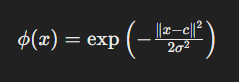

where:
- x is the input data point,
- c is the center of the RBF (a parameter),
- σ is the width parameter controlling the spread of the function.

In the context of machine learning, the Gaussian RBF is often used as a kernel function in support vector machines (SVMs) and kernelized versions of other algorithms. It allows the algorithms to operate in a higher-dimensional space where data points may become linearly separable, even if they are not in the original input space.

## Recap

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

%matplotlib inline

In [34]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


This is what the raw dataset looks like (visually)

In [45]:
cancer = load_breast_cancer()

# Convert the data and target arrays to a DataFrame
df_data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_target = pd.DataFrame(cancer.target, columns=['target'])

# Concatenate the data and target DataFrames
df = pd.concat([df_data, df_target], axis=1)

# Display the first 10 rows of the DataFrame
print(df.head(10))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

In [48]:
from sklearn.model_selection import train_test_split

X = df_feat
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# train the support vector classifier
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 56  10]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



from the test results earlier (after performing gridsearchCV):

[[ 59   7]
[  4 101]]
 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
    
   `macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171`


In [53]:
# normalize the data, adjust the parameters using "GridSearchCV"
# sklearn.grid_seach used to be the syntax, but it was changed to be sklearn.model_selection

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=1)

In [56]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

